# Yammer: Investigating a Drop in User Engagement

## Question:
### What is behind the recent drop in weekly user engagement?

### Engagement:
#### Making some type of server call by interacting with the product.

### User Engagement:
#### Measured as the number of users who logged at least one engagement event during the week starting on that date.

#### Note: Engagement figure is based on login events specifically, though this always precedes any other engagement activities

#### Hypotheses:
- Does it differ by country?
    - Time range corresponds to common European holiday


In [1]:
# Import packages
import os
import pandas as pd
from datetime import datetime
import seaborn as sns

In [2]:
# Read in data
os.chdir('/Users/ckm/insight/Data Challenges/Week2')
df_emails = pd.read_csv('yammer_emails.csv')
df_events = pd.read_csv('yammer_events.csv')
df_users = pd.read_csv('yammer_users.csv')
df_rollup = pd.read_csv('dimension_rollup_periods.csv')

In [3]:
# Functions to convert string timestamps to datetime, date, and time formats

def make_datetime(string):
    return datetime.strptime(string, '%Y-%m-%d %H:%M:%S')
def make_date(string):
    return datetime.strptime(string[:10], '%Y-%m-%d')
def make_time(string):
    return datetime.strptime(string[11:], '%H:%M:%S')

df_emails['datetime'] = df_emails['occurred_at'].apply(make_datetime)
df_emails['date'] = df_emails['occurred_at'].apply(make_date)
df_emails['time'] = df_emails['occurred_at'].apply(make_time)

df_users['datetime_c'] = df_users['created_at'].apply(make_datetime)
df_users['date_c'] = df_users['created_at'].apply(make_date)
df_users['time_c'] = df_users['created_at'].apply(make_time)

df_events['datetime'] = df_events['occurred_at'].apply(make_datetime)
df_events['date'] = df_events['occurred_at'].apply(make_date)
df_events['time'] = df_events['occurred_at'].apply(make_time)

In [4]:
# Merge dataframes into one, add some other info.

df_emails = df_emails.rename({'action': 'event_type'}, axis='columns')
df_emails = df_emails.set_index('user_id', drop=False)
df_users = df_users.set_index('user_id', drop=False)
df_events = df_events.set_index('user_id', drop=False)
df_full = pd.concat([df_emails, df_events], sort=False)

def add_comp(row):
    return df_users['company_id'].loc[row]

df_full['company_id'] = df_full['user_id'].apply(add_comp)

# Yammer emails
## Exploratory Data Analysis

## Email clickthroughs are down, though they are still being opened:

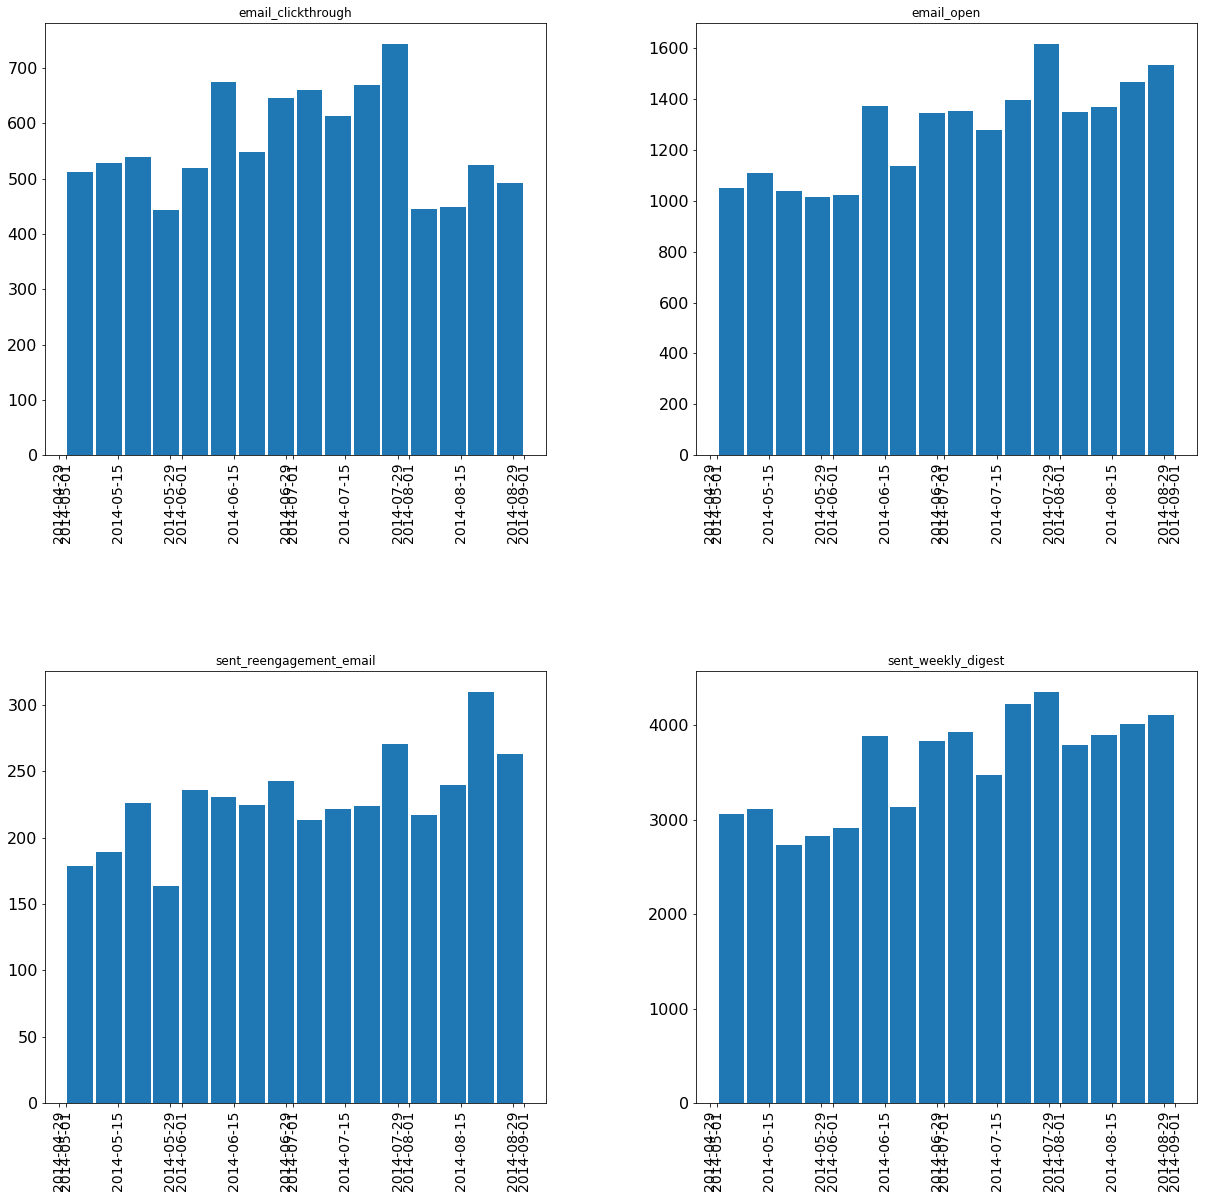

In [5]:
ax = df_emails.hist(column='date', by='event_type', figsize=(20,20), bins=16,
                    range=('2014-05-01', '2014-09-01'), rwidth=0.9,
                    xlabelsize=14, ylabelsize=16)

# Yammer users
## Exploratory Data Analysis

## Number of active users in companies

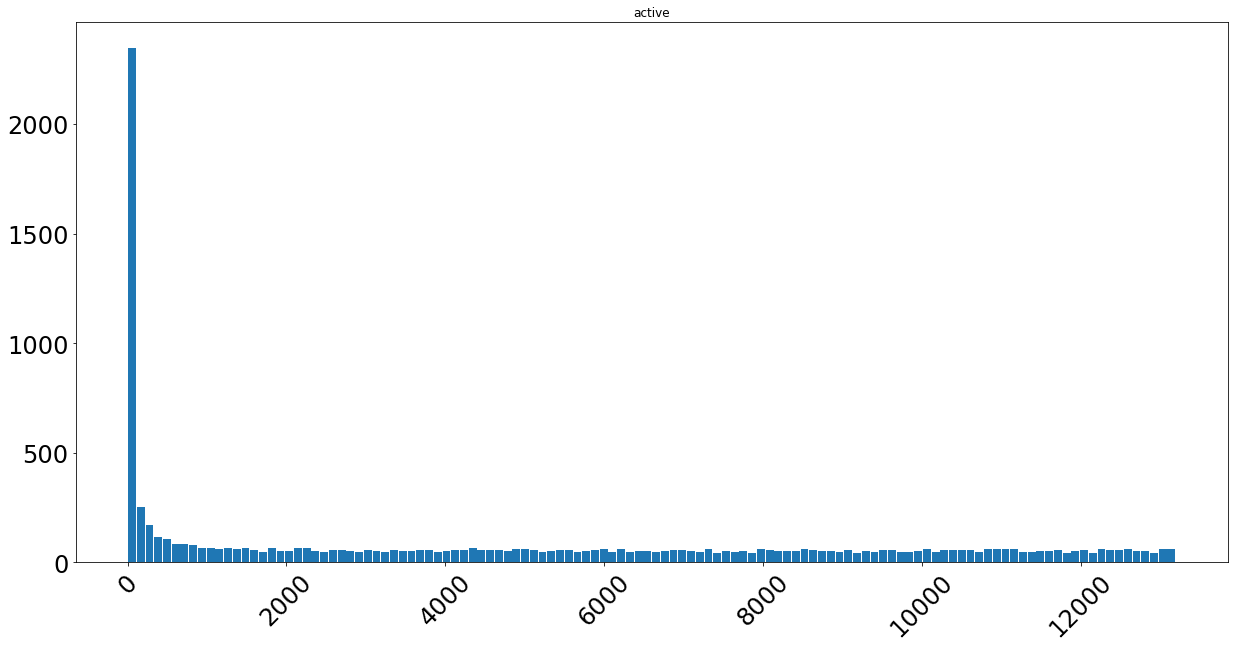

In [6]:
ax=df_users[df_users['state']=='active'].hist(column='company_id', by='state',
                                              bins=120, figsize=(20,10), xrot=45,
                                              rwidth=0.9,xlabelsize=24, ylabelsize=24)

## Not many more unique users than companies:

In [7]:
companies = df_users['company_id'].unique()
print('Unique companies: ' + str(len(companies)))
print('Total users: ' + str(len(df_users)))

Unique companies: 13198
Total users: 19066


## Signups are actually increasing

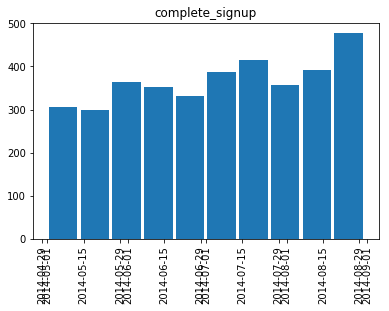

In [8]:
ax=df_events[df_events['event_name']=='complete_signup'].hist(column='date',
                                                              by='event_name',
                                                              rwidth=0.9)

## Decreasing trend consistent across event types:

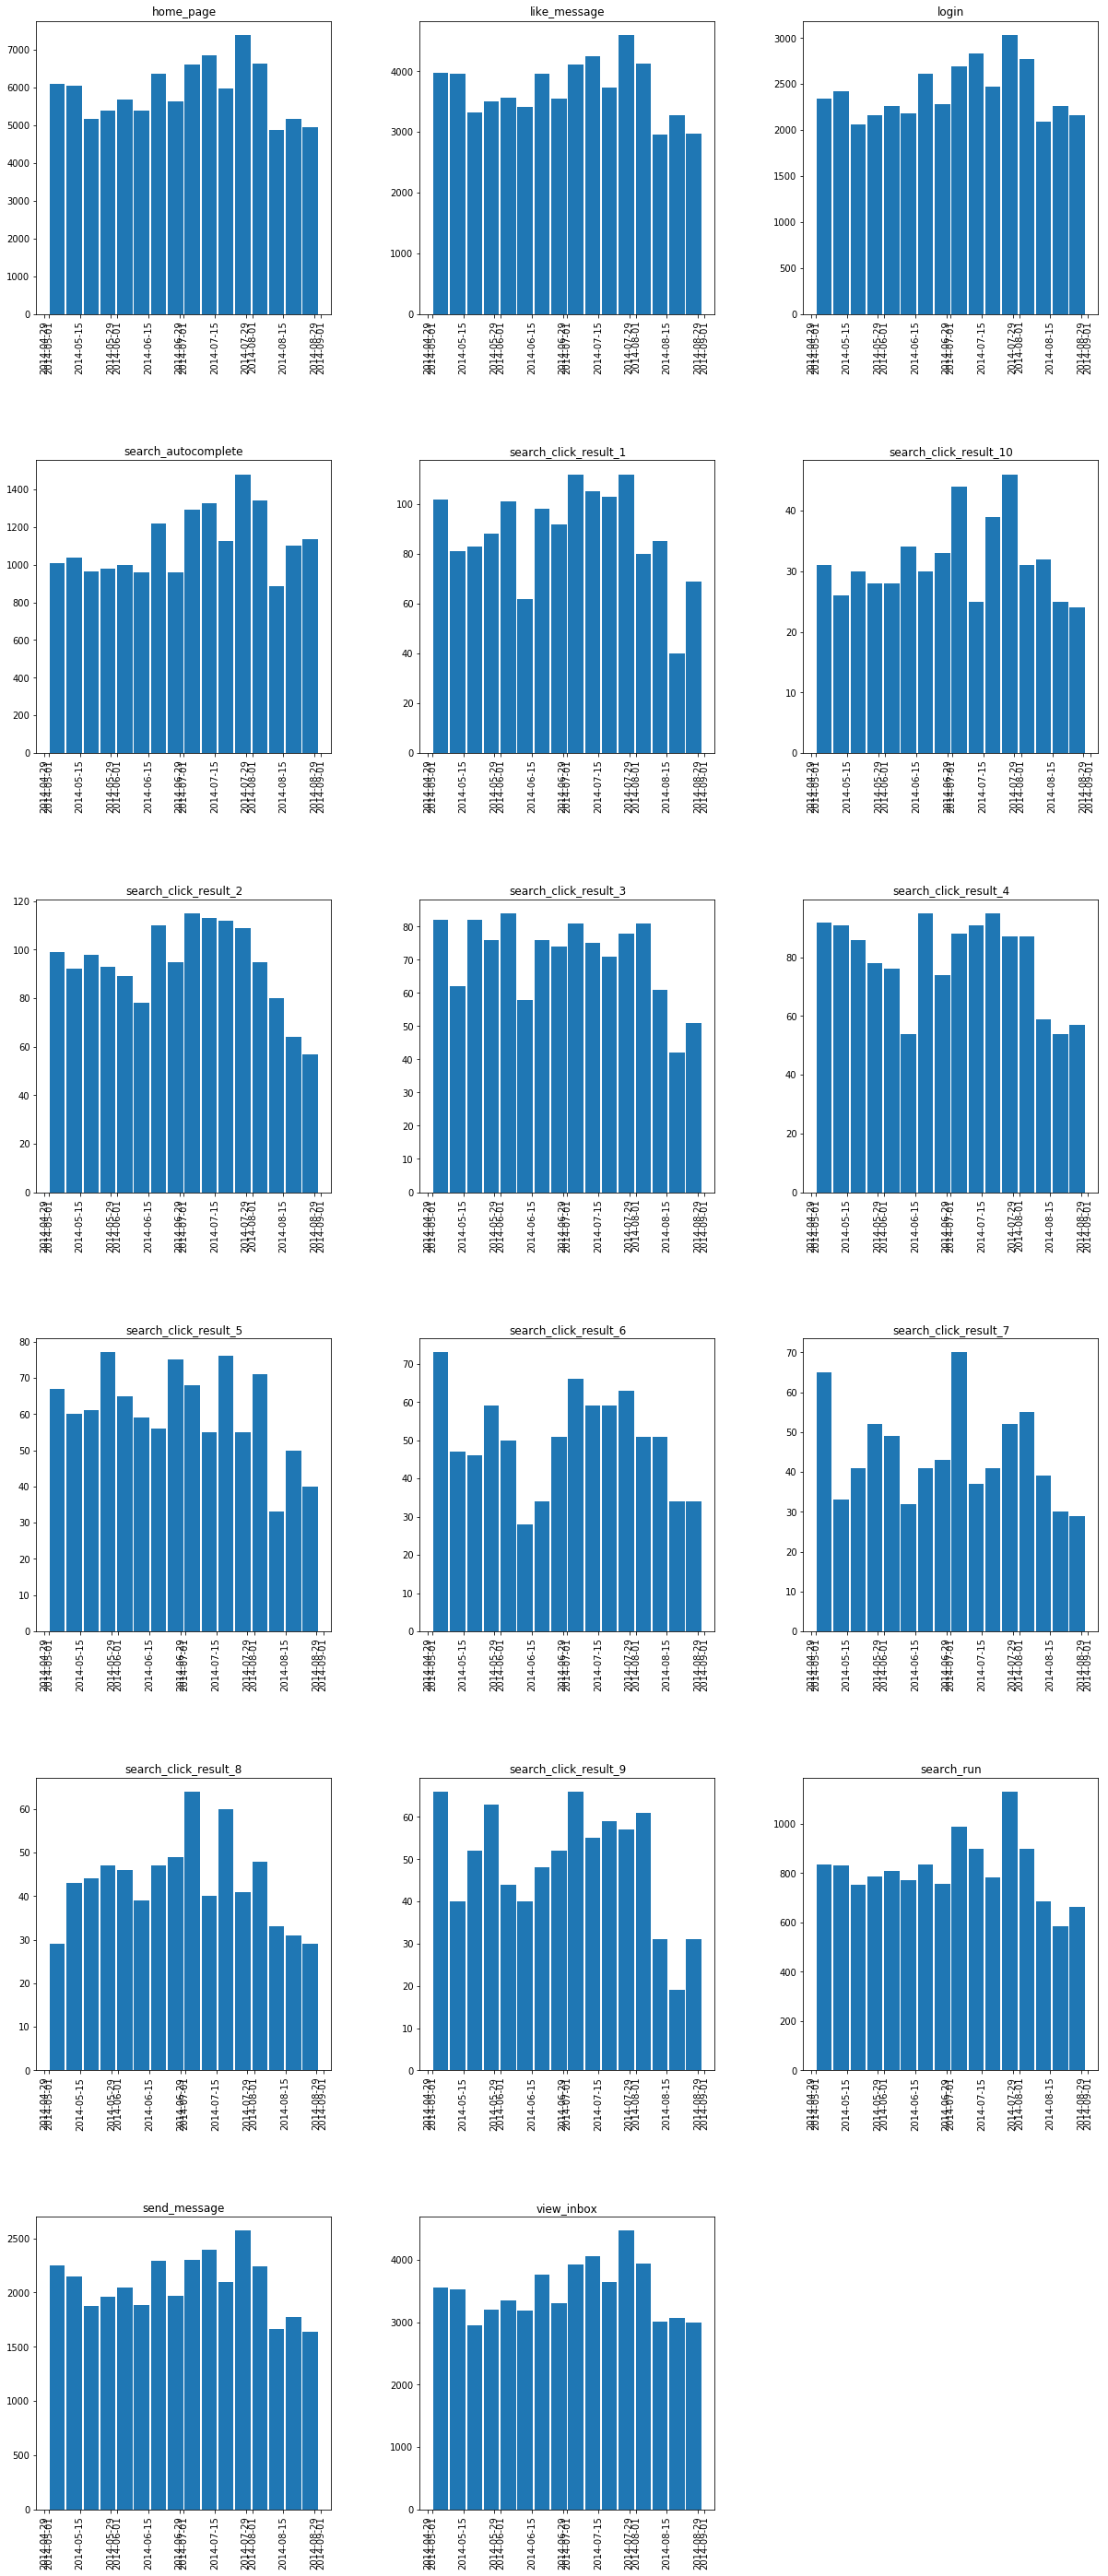

In [9]:
ax=df_events[df_events['event_type']=='engagement'].hist(column='date', by='event_name',
                                                         figsize=(20,50), layout=(6,3),
                                                         bins=16, rwidth=0.9)

## Decrease most pronounced in user type 1, though present across all:

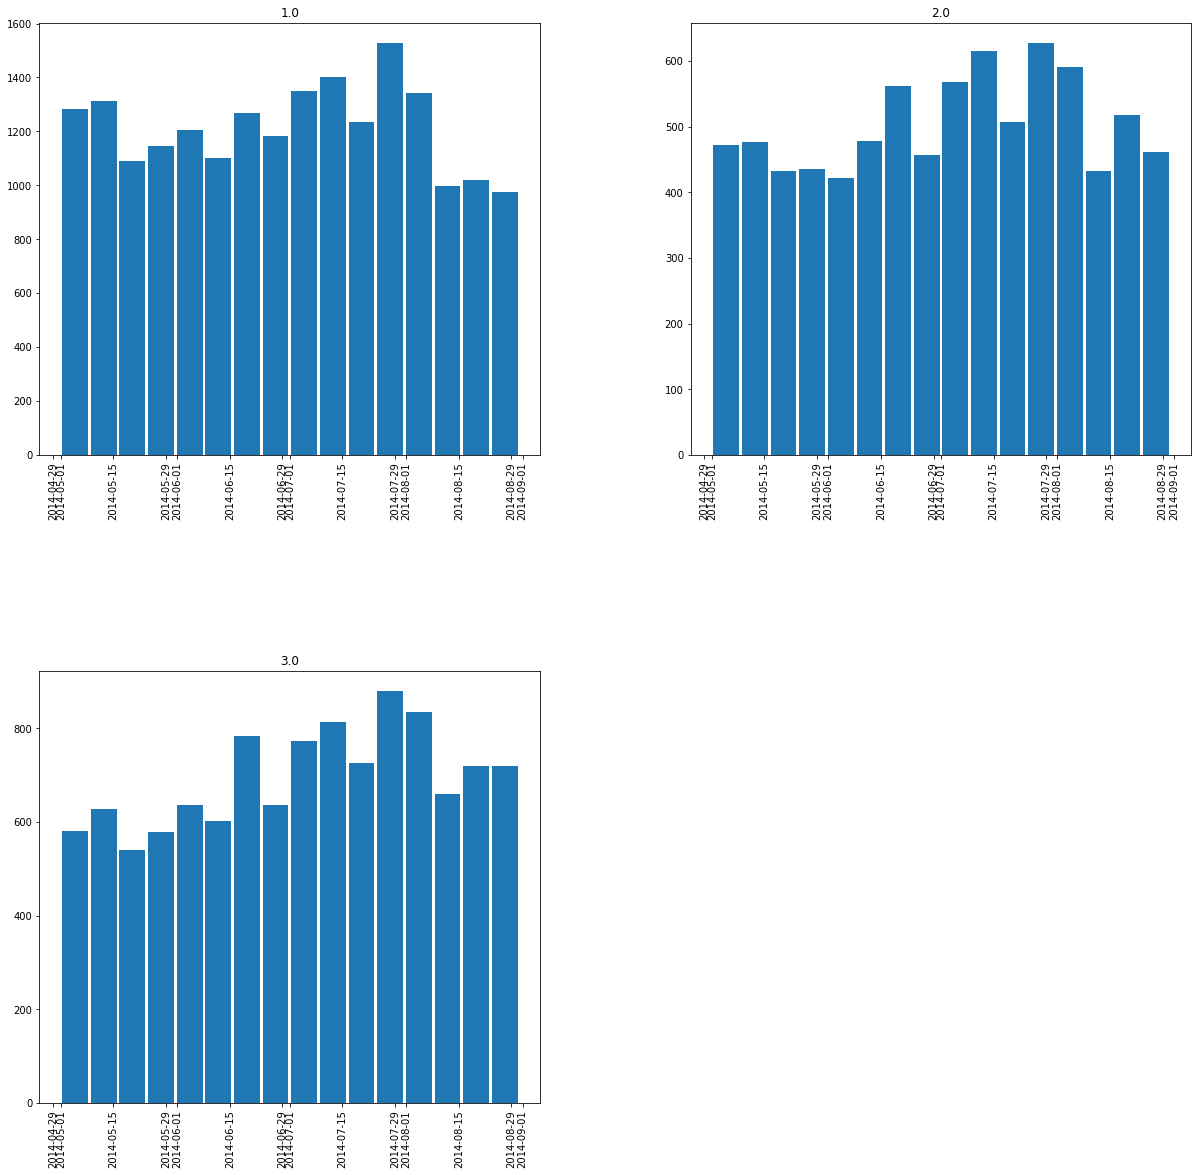

In [10]:
ax=df_events[df_events['event_name']=='login'].hist(column='date', by='user_type',
                                                    figsize=(20,20), bins=16,
                                                    rwidth=0.9)

## Decrease in logins appears more pronounced in many European countries:

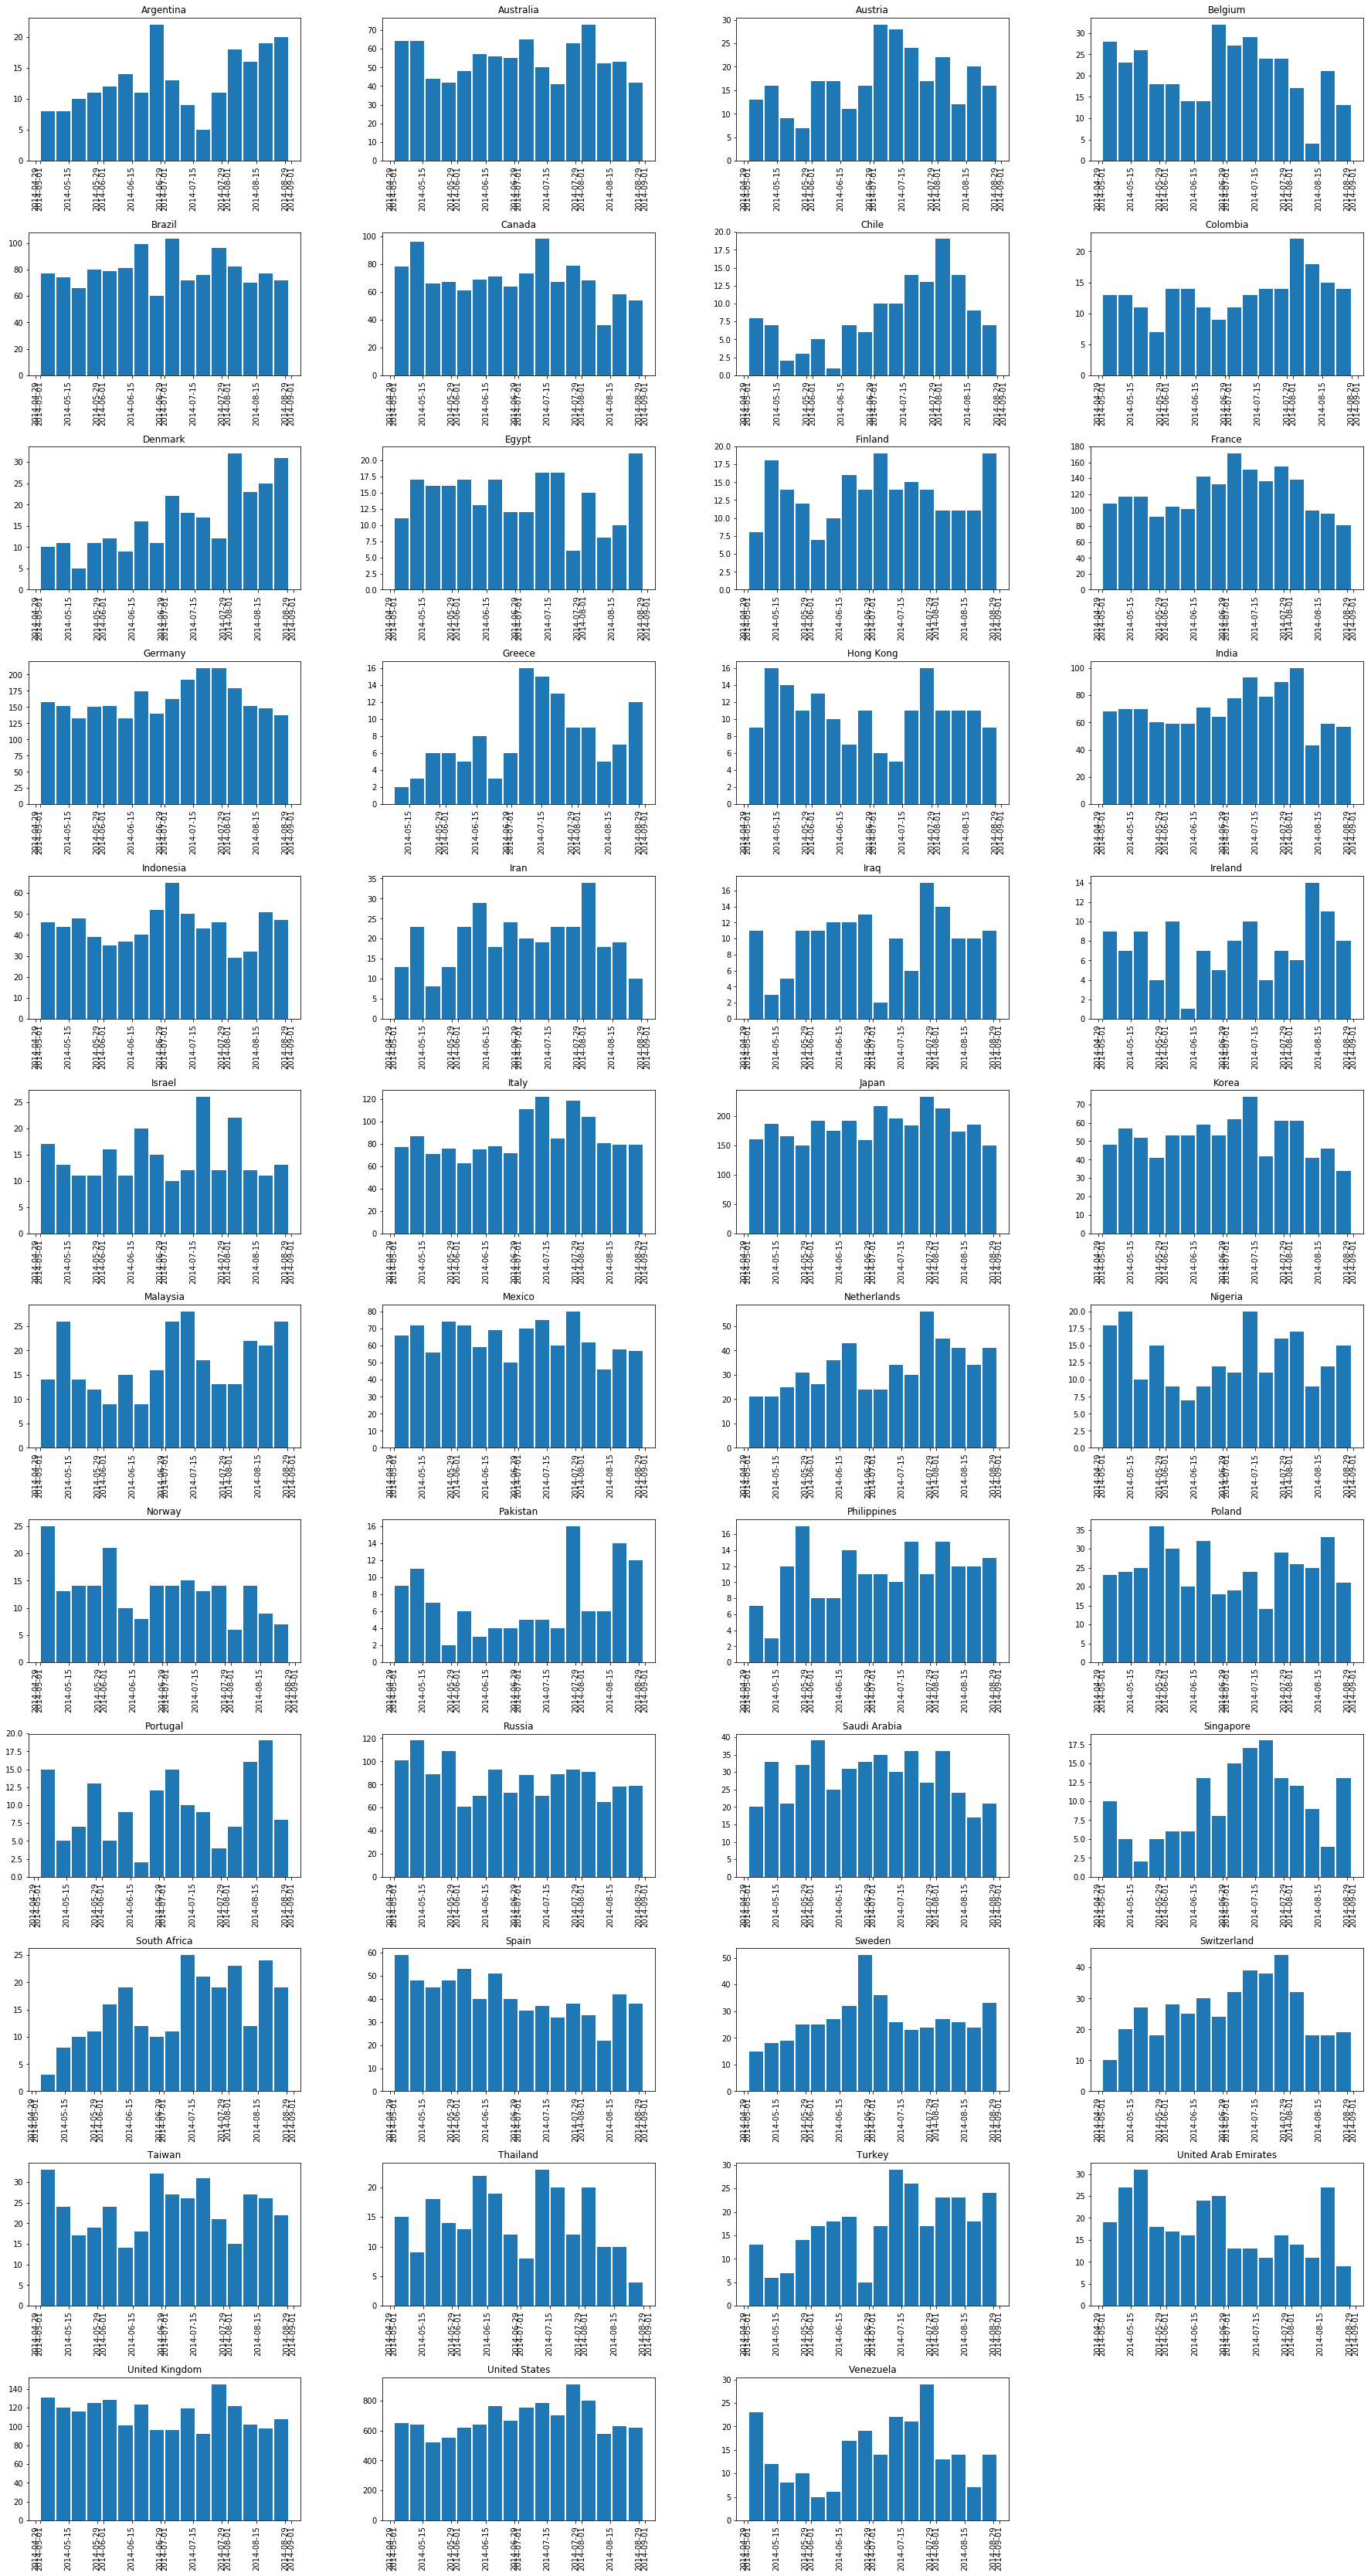

In [11]:
ax=df_events[df_events['event_name']=='login'].hist(column='date', by='location',
                                                        figsize=(30,60), layout=(12,4),
                                                        rwidth=0.9, bins=16)

## Not due to complete failure on a device:

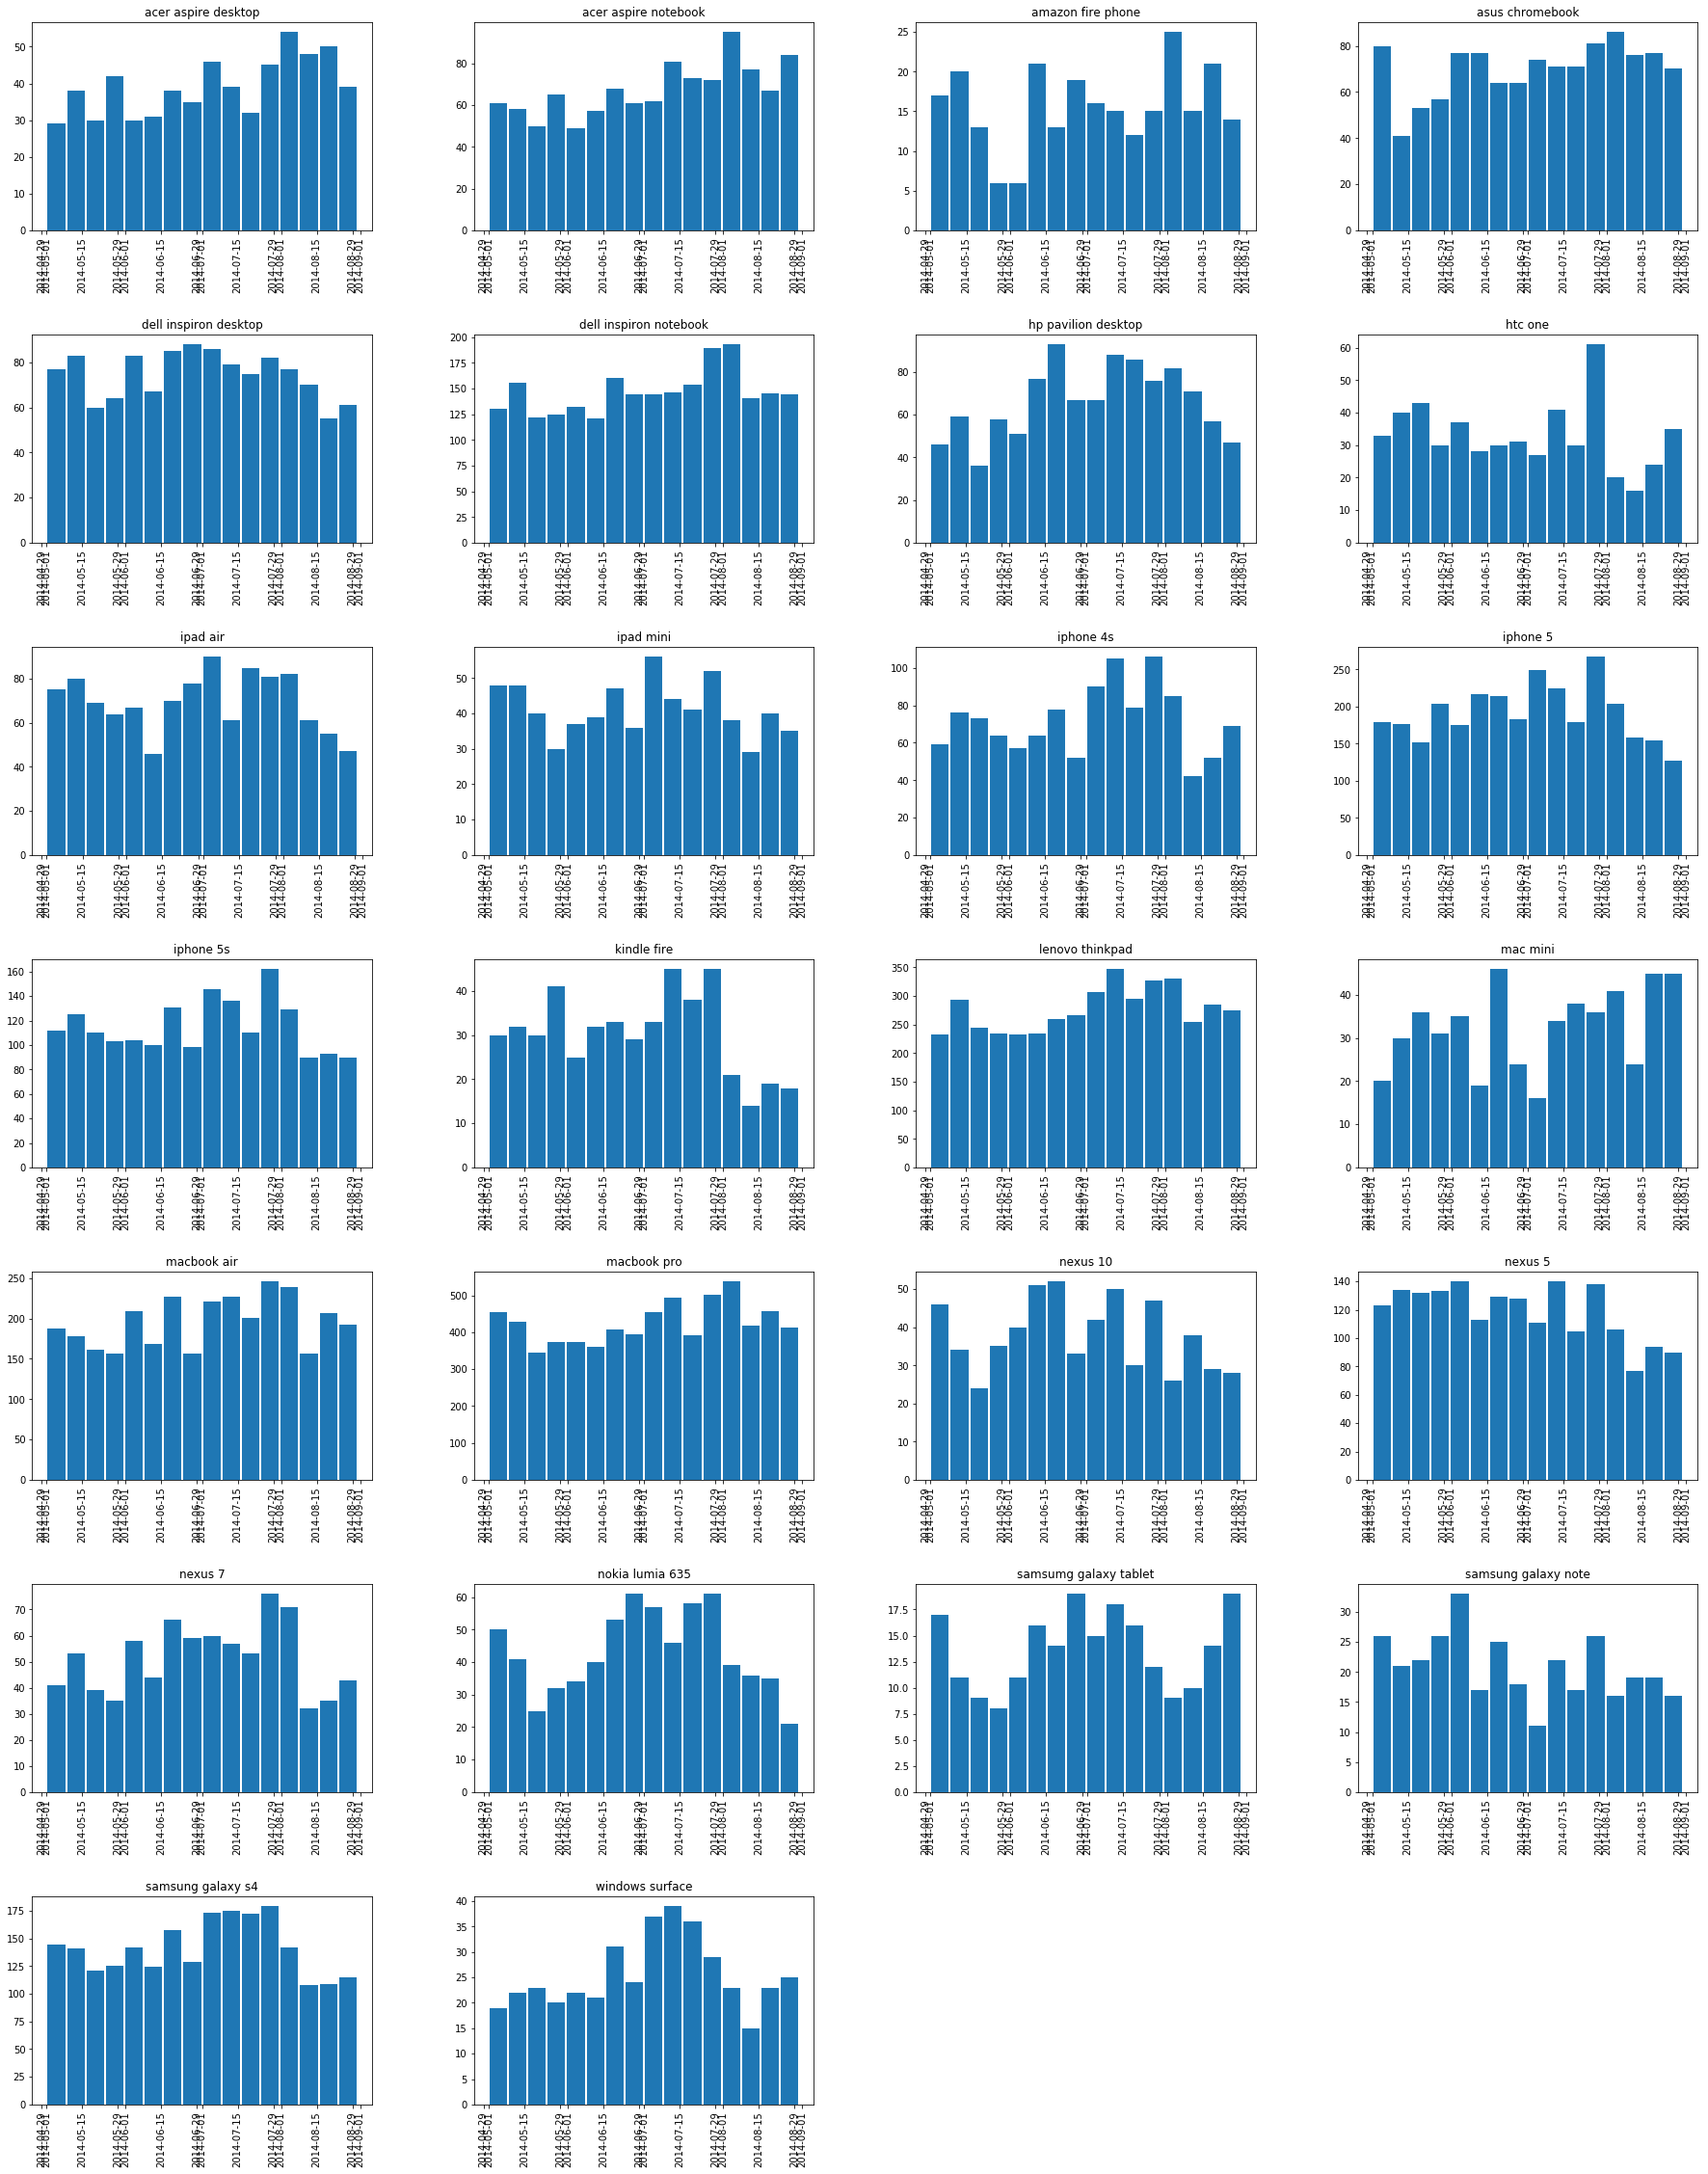

In [12]:
ax=df_events[df_events['event_name']=='login'].hist(column='date', by='device',
                                                    figsize=(30,40), layout=(7,4),
                                                    rwidth=0.9, bins=16)

# Ultimately, decrease in user engagement is likely due to the European holiday in August when fewer people are working.

# Given the increase in user signups, engagement will likely rebound and return to previous growth.